In [1]:
import pandas as pd
import os

In [2]:
os.environ['KAGGLE.CONFIG.DIR']="."

In [4]:
from google.colab import files
!mkdir -p ~/.config/kaggle
!mv kaggle.json ~/.config/kaggle/
!chmod 600 ~/.config/kaggle/kaggle.json

In [5]:
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia

  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 713MB/s]


In [6]:
!unzip udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip

Archive:  udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


In [10]:
df=pd.read_csv("train.csv")
df

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Si,...,N,No,Si,Si,Secundaria (Bachillerato) incompleta,bajo,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo,0.286,0.240,0.314,0.287
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,No,...,N,Si,Si,No,Primaria completa,bajo,0.132,0.426,0.261,0.328


In [11]:
df.columns

Index(['ID', 'PERIODO_ACADEMICO', 'E_PRGM_ACADEMICO', 'E_PRGM_DEPARTAMENTO',
       'E_VALORMATRICULAUNIVERSIDAD', 'E_HORASSEMANATRABAJA',
       'F_ESTRATOVIVIENDA', 'F_TIENEINTERNET', 'F_EDUCACIONPADRE',
       'F_TIENELAVADORA', 'F_TIENEAUTOMOVIL', 'E_PRIVADO_LIBERTAD',
       'E_PAGOMATRICULAPROPIO', 'F_TIENECOMPUTADOR', 'F_TIENEINTERNET.1',
       'F_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL', 'INDICADOR_1', 'INDICADOR_2',
       'INDICADOR_3', 'INDICADOR_4'],
      dtype='object')

In [41]:
serie=df[['F_TIENEINTERNET','E_HORASSEMANATRABAJA','RENDIMIENTO_GLOBAL']]
serie.head()

,F_TIENEINTERNET,E_HORASSEMANATRABAJA,RENDIMIENTO_GLOBAL
0,Si,Menos de 10 horas,medio-alto
1,No,0,bajo
2,Si,Más de 30 horas,bajo
3,Si,0,alto
4,Si,Entre 21 y 30 horas,medio-bajo


<Axes: xlabel='RENDIMIENTO_GLOBAL'>

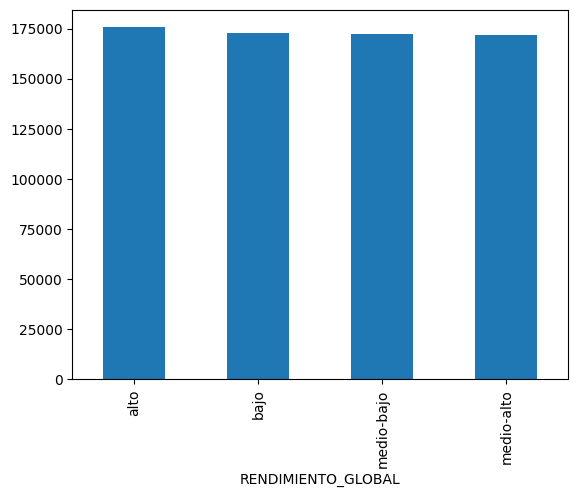

In [20]:
df.RENDIMIENTO_GLOBAL.value_counts().plot(kind='bar')

<Axes: xlabel='E_HORASSEMANATRABAJA'>

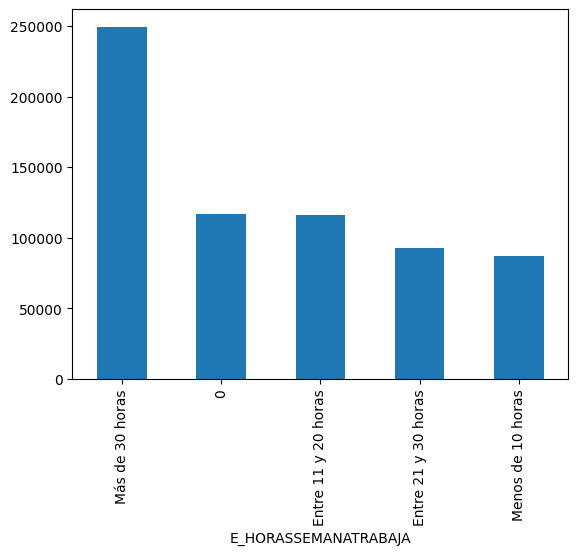

In [22]:
df.E_HORASSEMANATRABAJA.value_counts().plot(kind='bar')

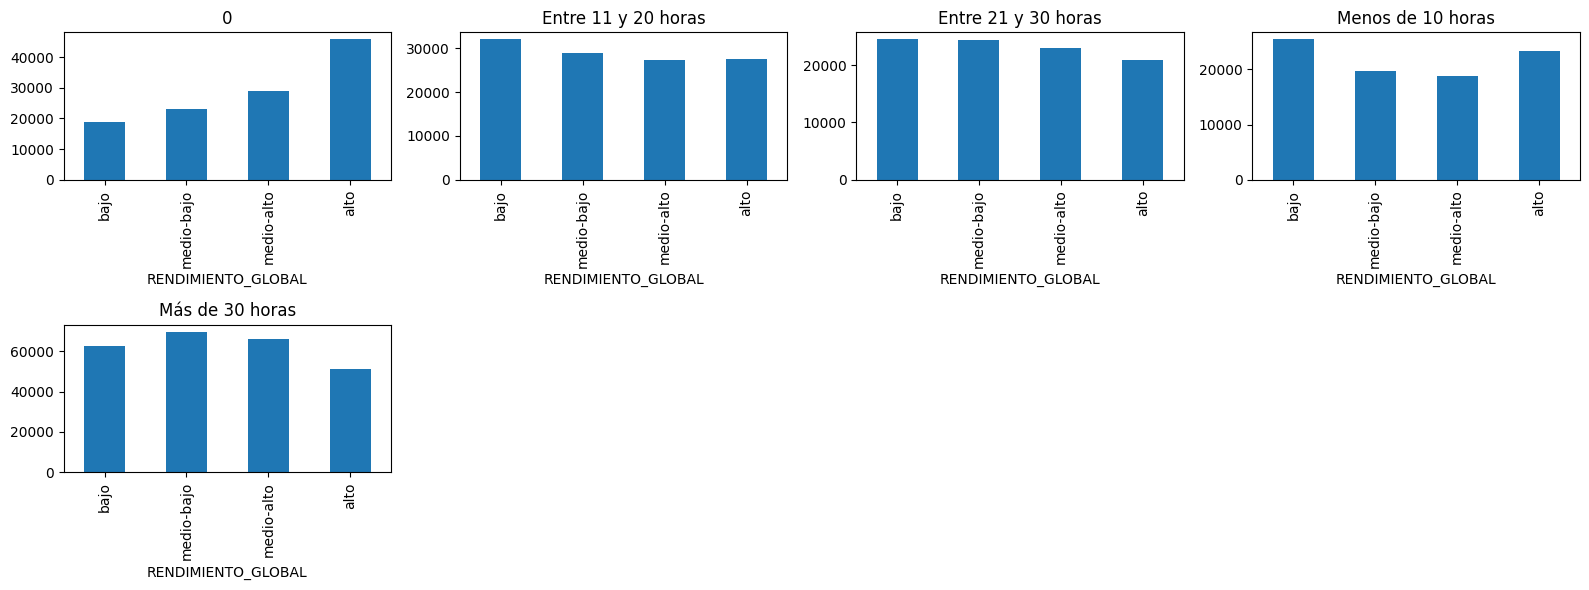

In [47]:
!pip install rlxutils

from rlxutils import subplots
import matplotlib.pyplot as plt

c = sorted(df.E_HORASSEMANATRABAJA.value_counts().index)
for eje,categoria in subplots(c, n_cols=4, usizex=4):
    zc = df[df.E_HORASSEMANATRABAJA==categoria]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(categoria)

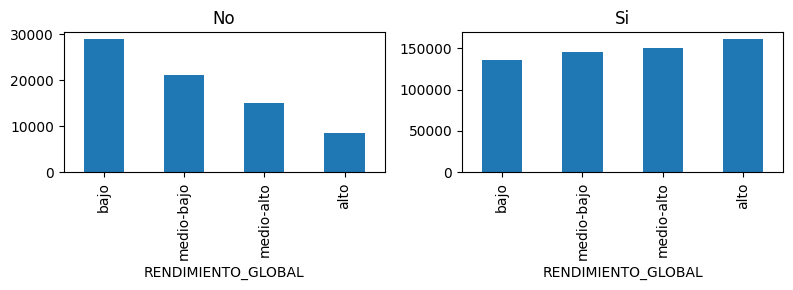

In [48]:
datos_filtrados = sorted(df.F_TIENEINTERNET.value_counts().index)
for eje,categoria in subplots(datos_filtrados, n_cols=4, usizex=4):
    zc = df[df.F_TIENEINTERNET==categoria]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar', ax=eje)
    plt.title(categoria)